In [1]:
from stable_baselines3 import PPO
from kaggle_environments import make
import numpy as np
import random
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

/Users/rserra/miniforge3/envs/connect_x/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading environment lux_ai_2022 failed: No module named 'vec_noise'


In [2]:
path = "data"

all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df.head()

,model,version,vs random win,vs random invalid,vs look win,vs look invalid,vs negamax win,vs negamax invalid,saved on
0,model_size64_2048_1_v8,100000,0.64,0,0.00,0,0.01,0,2023-03-29 17:47:42.960441
1,model_size64_2048_1_v8,200000,0.64,0,0.01,0,0.01,0,2023-03-29 18:09:51.736760
2,model_size64_2048_1_v8,300000,0.79,0,0.05,0,0.02,0,2023-03-29 18:30:13.327518
3,model_size64_2048_1_v8,400000,0.73,0,0.10,0,0.01,0,2023-03-29 18:50:20.506274
4,model_size64_2048_1_v8,500000,0.74,0,0.22,0,0.02,0,2023-03-29 19:11:17.966104


In [4]:
# Models 

df.model.unique()

array(['model_size64_2048_1_v8', 'model_size_small_64_2048_v9',
       'model_size_self_big64_2048_v8', 'model_size_self_big64_2048_v9',
       'model_size_big64_2048_v8', 'model_control_120big_v8',
       'model_size_big64_2048_v5', 'model_control_1_v8',
       'model_size_self_big64_2048_v5', 'model_control_v5',
       'model_control_1_nega_v8'], dtype=object)

# All models

Vs random

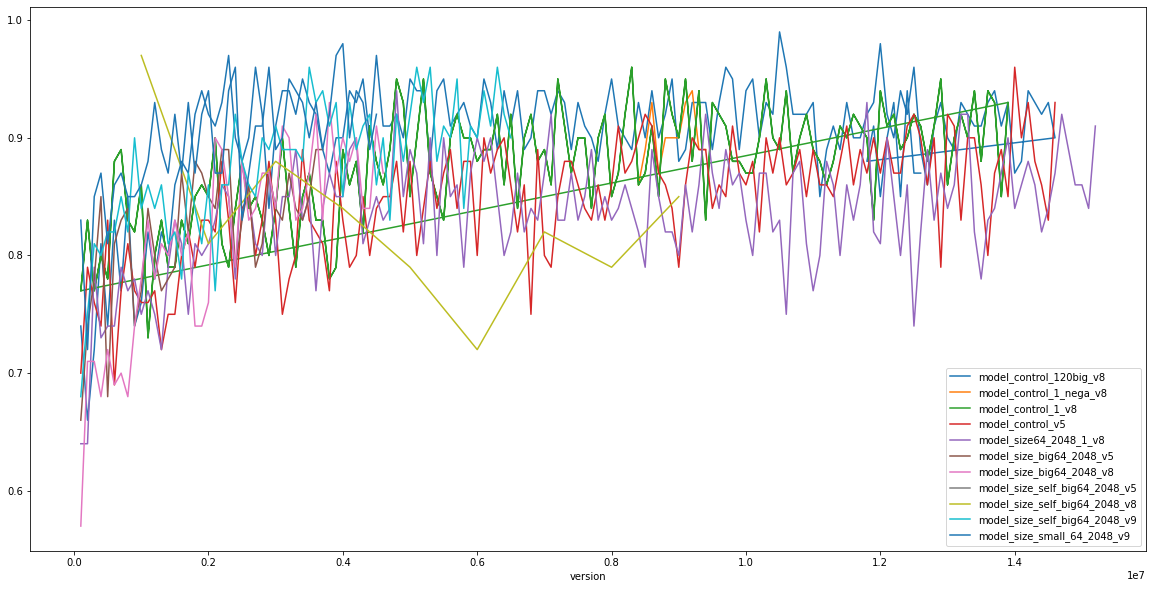

In [5]:
filter_out = []

df_vs_random = df[['model', 'version', 'vs random win', 'vs look win']]
df_vs_random.set_index('version', inplace=True)


df_vs_random[~df_vs_random['model'].isin(filter_out)].groupby("model")['vs random win'].plot(x='version', subplots=False, legend=True, figsize=(20, 10))
plt.show()

model
model_control_120big_v8          0.903097
model_control_1_nega_v8          0.900000
model_control_1_v8               0.876691
model_control_v5                 0.847397
model_size64_2048_1_v8           0.837105
model_size_big64_2048_v5         0.821081
model_size_big64_2048_v8         0.815000
model_size_self_big64_2048_v5    0.810000
model_size_self_big64_2048_v8    0.830000
model_size_self_big64_2048_v9    0.876000
model_size_small_64_2048_v9      0.895333
Name: vs random win, dtype: float64


<AxesSubplot: title={'center': 'AVG vs random winds'}, ylabel='model'>

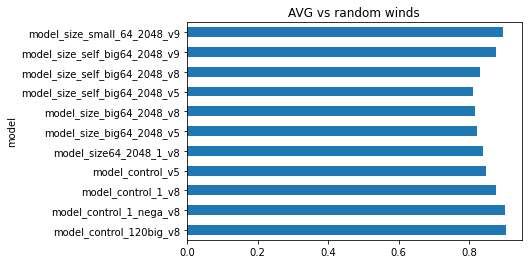

In [6]:
print(df_vs_random.groupby("model")['vs random win'].mean())
df_vs_random.groupby("model")['vs random win'].mean().plot(kind='barh', y='vs random win', title='AVG vs random winds')

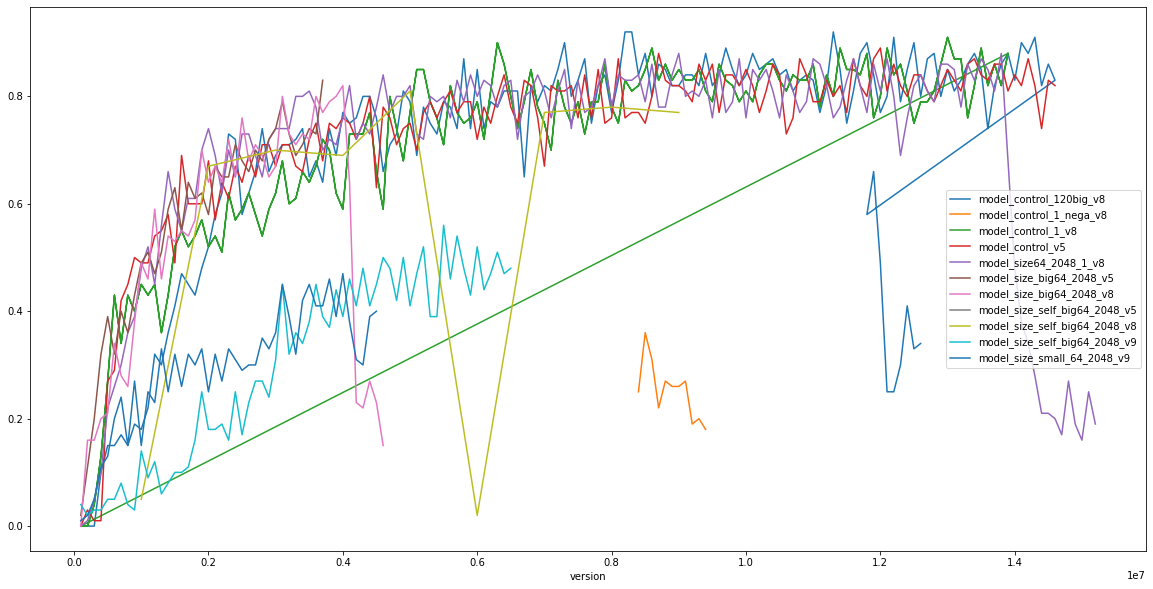

In [7]:
df_vs_random.groupby("model")['vs look win'].plot(x='version', subplots=False, legend=True, figsize=(20, 10))

plt.show()

model
model_control_120big_v8          0.705935
model_control_1_nega_v8          0.251818
model_control_1_v8               0.716403
model_control_v5                 0.733425
model_size64_2048_1_v8           0.696776
model_size_big64_2048_v5         0.562973
model_size_big64_2048_v8         0.528478
model_size_self_big64_2048_v5    0.480000
model_size_self_big64_2048_v8    0.584444
model_size_self_big64_2048_v9    0.301077
model_size_small_64_2048_v9      0.295111
Name: vs look win, dtype: float64


<AxesSubplot: title={'center': 'AVG vs look win'}, ylabel='model'>

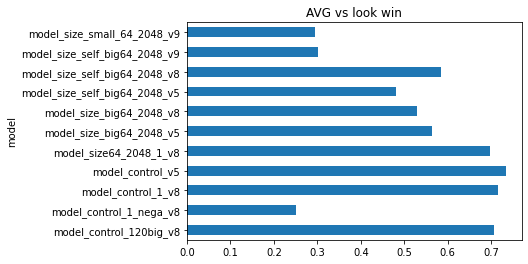

In [8]:
print(df_vs_random.groupby("model")['vs look win'].mean())
df_vs_random.groupby("model")['vs look win'].mean().plot(kind='barh', y='vs look win', title='AVG vs look win')

model
model_control_120big_v8          0.92
model_control_1_nega_v8          0.36
model_control_1_v8               0.91
model_control_v5                 0.89
model_size64_2048_1_v8           0.88
model_size_big64_2048_v5         0.83
model_size_big64_2048_v8         0.82
model_size_self_big64_2048_v5    0.48
model_size_self_big64_2048_v8    0.81
model_size_self_big64_2048_v9    0.56
model_size_small_64_2048_v9      0.47
Name: vs look win, dtype: float64


<AxesSubplot: title={'center': 'MAX vs Look Max'}, ylabel='model'>

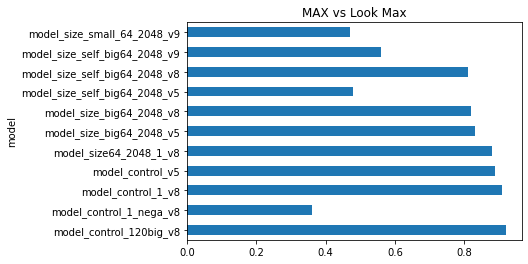

In [9]:
print(df_vs_random.groupby("model")['vs look win'].max())
df_vs_random.groupby("model")['vs look win'].max().plot(kind='barh', y='vs look win', title='MAX vs Look Max')

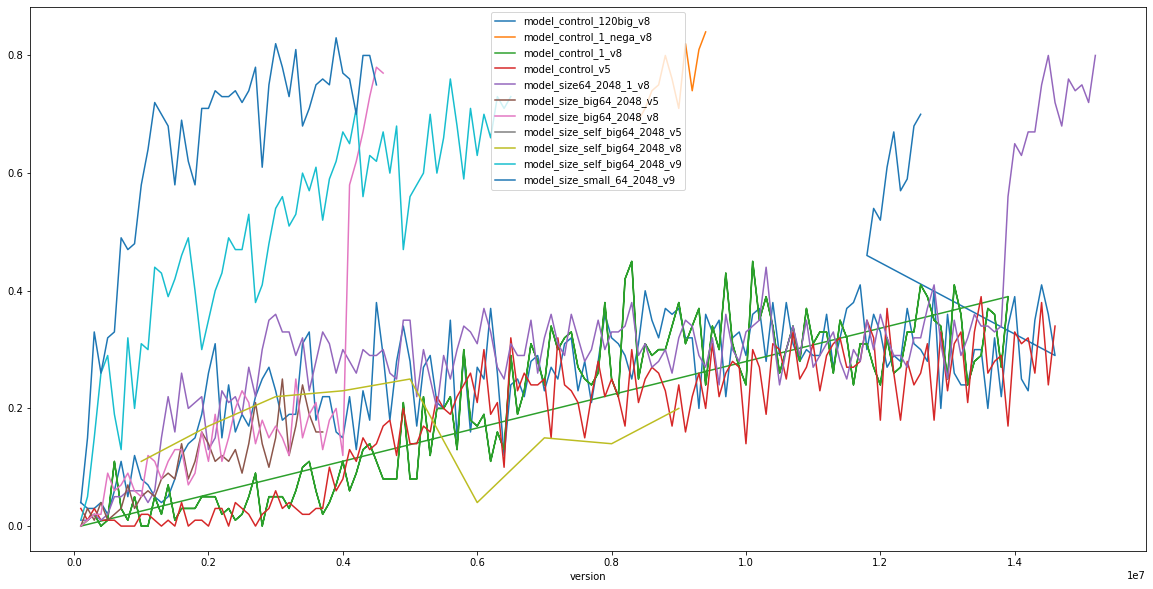

In [11]:
filter_out = []

df_vs_negamax = df[['model', 'version', 'vs negamax win']]
df_vs_negamax.set_index('version', inplace=True)


df_vs_negamax[~df_vs_random['model'].isin(filter_out)].groupby("model")['vs negamax win'].plot(x='version', subplots=False, legend=True, figsize=(20, 10))
plt.show()

In [10]:
def plot_model(df, model_name):
    df_single_model = df[['model', 'version', 'vs random win', 'vs look win']]
    df_single_model[df['model'] == model_name].plot(x='version', subplots=False, legend=True, figsize=(20, 10))
    plt.show()

In [255]:
from connectx.utils import get_win_percentages, get_win_percentages_first
from connectx.environment import ConnectFourGymV2
from connectx.lookahead import multistep_agent_factory


In [256]:
from connectx.models.model_5_v5 import get_model

In [257]:
env = ConnectFourGymV2()
look_agent = multistep_agent_factory()
learner = get_model(env)
learner.load_model_version(env, "1100000")
agent = learner.get_agent()
results = get_win_percentages_first(agent, "random")
print("STARTING First")
print(results)
results = get_win_percentages_first("random", agent)
print("STARTING Second")
print(results)

results = get_win_percentages_first(agent, look_agent)
print("STARTING First vs Look agent")
print(results)
results = get_win_percentages_first(look_agent, agent)
print("STARTING Second vs Look agent")
print(results)

Getting agent
STARTING First
Results(agent1_wins=0.9, agent2_wins=0.1, agent1_inv=0, agent2_inv=0)
STARTING Second
Results(agent1_wins=0.28, agent2_wins=0.71, agent1_inv=0, agent2_inv=0)
STARTING First vs Look agent
Results(agent1_wins=0.79, agent2_wins=0.21, agent1_inv=0, agent2_inv=0)
STARTING Second vs Look agent
Results(agent1_wins=0.84, agent2_wins=0.16, agent1_inv=0, agent2_inv=0)


In [186]:
from connectx.models.model_3 import get_model

In [188]:
env = ConnectFourGymV2()
look_agent = multistep_agent_factory()
learner = get_model(env)
learner.load_model_version(env, "700000")
agent = learner.get_agent()
results = get_win_percentages_first(agent, "random")
print("STARTING First vs Random")
print(results)
results = get_win_percentages_first("random", agent)
print("STARTING Second vs Random")
print(results)

results = get_win_percentages_first(agent, look_agent)
print("STARTING First vs Look agent")
print(results)
results = get_win_percentages_first(look_agent, agent)
print("STARTING Second vs Look agent")
print(results)

Getting agent
STARTING First vs Random
Results(agent1_wins=0.95, agent2_wins=0.05, agent1_inv=0, agent2_inv=0)
STARTING Second vs Random
Results(agent1_wins=0.31, agent2_wins=0.69, agent1_inv=0, agent2_inv=0)
STARTING First vs Look agent
Results(agent1_wins=0.37, agent2_wins=0.61, agent1_inv=0, agent2_inv=0)
STARTING Second vs Look agent
Results(agent1_wins=0.99, agent2_wins=0.01, agent1_inv=0, agent2_inv=0)
